In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Step. Combine Questions & Answers data

In [2]:
q_df = pd.read_csv('./data/questions.csv')
a_df = pd.read_csv('./data/answers.csv')

In [3]:
qa_df = pd.merge(q_df,a_df, left_on = 'questions_id', right_on = 'answers_question_id', how='outer')
qa_df.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


## 1) How many answers are provided per question?

In [7]:
df_answer_per_question=pd.DataFrame(qa_df.groupby(['questions_id'],as_index=False).count())[['questions_id','answers_id']]

In [8]:
print(df_answer_per_question.info())

df_answer_per_question=df_answer_per_question.sort_values('answers_id',ascending=False).reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23931 entries, 0 to 23930
Data columns (total 2 columns):
questions_id    23931 non-null object
answers_id      23931 non-null int64
dtypes: int64(1), object(1)
memory usage: 560.9+ KB
None


In [11]:
df_answer_per_question['answers_id'].value_counts()

1     10067
2      6071
3      3160
4      2318
0       821
5       718
6       299
7       149
8        94
9        56
10       49
11       26
12       25
13       16
15       13
14       12
17        5
18        4
16        4
24        3
22        3
21        3
20        3
19        3
31        2
26        2
25        1
58        1
43        1
30        1
23        1
Name: answers_id, dtype: int64

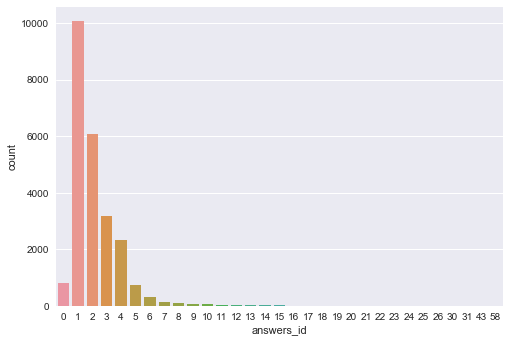

In [14]:
import seaborn as sns
sns.countplot(x='answers_id',data=df_answer_per_question)

## 2) Word Cloud: Word Frequency for Questions Title

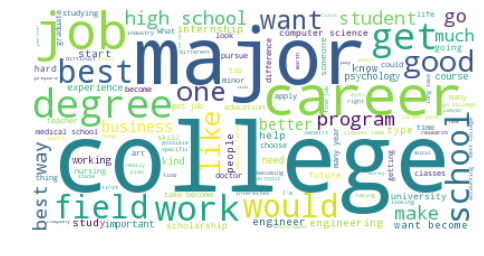

In [26]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
              'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 
              'her', 'hers', 'herself', 'it', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 
              'what', 'which', 'who', 'whom', 'this', 'that', 
              'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
              'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 
              'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 
              'where', 'why', 'how', 'all', 'any', 'both', 'each', 
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 
              'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
              'too', 'very', 's', 't', 'can', 'will', 
              'just', 'don', 'should', 'now']

qs = " ".join(title for title in q_df['questions_title'])
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(qs)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3) Word Cloud:  Word Frequency of Answers Body

In [17]:
a_df['answers_body'] = a_df['answers_body'].astype('str')

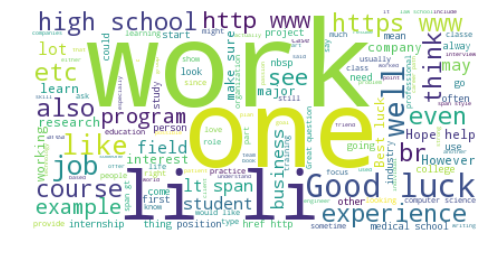

In [18]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
              'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 
              'her', 'hers', 'herself', 'it', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 
              'what', 'which', 'who', 'whom', 'this', 'that', 
              'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
              'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 
              'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 
              'where', 'why', 'how', 'all', 'any', 'both', 'each', 
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 
              'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
              'too', 'very', 's', 't', 'can', 'will', 
              'just', 'don', 'should', 'now']

a_s = " ".join(title for title in a_df['answers_body'])
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(a_s)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Step. Exploratory Data Analysis : Professionals Data

In [15]:
prof_df=pd.read_csv('./data/professionals.csv')
prof_df.info()
prof_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28152 entries, 0 to 28151
Data columns (total 5 columns):
professionals_id             28152 non-null object
professionals_location       25054 non-null object
professionals_industry       25576 non-null object
professionals_headline       26085 non-null object
professionals_date_joined    28152 non-null object
dtypes: object(5)
memory usage: 1.1+ MB


,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [5]:
prof_df['professionals_industry'].describe()

count                  25576
unique                  2470
top       Telecommunications
freq                    3166
Name: professionals_industry, dtype: object

In [48]:
prof_df['professionals_headline'].describe()

count     26085
unique    22272
top          --
freq        325
Name: professionals_headline, dtype: object

In [76]:
prof_df_industry=prof_df['professionals_industry'].value_counts()

In [78]:
print(prof_df_industry)

Telecommunications                                                                                                3166
Information Technology and Services                                                                               2109
Computer Software                                                                                                 1272
Hospital and Health Care                                                                                           862
Higher Education                                                                                                   800
Accounting                                                                                                         781
Financial Services                                                                                                 639
Education Management                                                                                               593
Marketing and Advertising                       

In [70]:
print(prof_df_industry.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 1 columns):
professionals_industry    2470 non-null object
dtypes: object(1)
memory usage: 19.4+ KB
None


## 4) Frequency counts of Professionals Industry, Position Title, Location

In [108]:
#drop null values
prof_df.dropna(axis=0, how='any')

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
15,68ecc66323b8418092fdd724aaf5be94,"New York, New York",Special Events,Event Hospitality & Operations Specialist,2011-12-26 05:00:00 UTC+0000
30,c79d4e4fd9af4ab7a7e6b6f433128476,"New York, New York","education, tech, media","media, technology, education",2011-12-26 05:00:00 UTC+0000
52,1e4cc96c24344c8b806c26c3e6746167,"Boston, Massachusetts",Hospitality & Consulting,Hospitality and Restaurant Consultant,2011-12-28 14:35:42 UTC+0000
73,1ec14aee9311480681dfa81b0f193de8,"Denton, Texas",Software,Google Software Engineer,2012-01-15 19:21:07 UTC+0000
86,ccad7c94952a49b9ad0fb85b09d1398d,"New York, New York",Mobile,Co-founder of mobile fashion shopping app,2012-01-23 16:54:25 UTC+0000
92,44b2484ecd3642c6a47514f3876cf14a,"Cambridge, Massachusetts","Healthcare, Pharmaceuticals, Life Science",Scientist and Healthcare Entrepreneur,2012-01-25 20:40:43 UTC+0000
116,36adb6e6f7934f3c82eac29a615d066f,"Boston, Massachusetts",IP,CEO and Founder,2012-02-17 15:09:45 UTC+0000
120,bccd61129e1c495e94b28e8e6d326388,"Foxborough, Massachusetts","Business Development, Electrical Engineering","Electrical Engineer, Entrepreneur, and Lightin...",2012-02-18 19:59:28 UTC+0000
223,49ae0135ce3548ffab2eb79b9c1f2882,"Cambridge, Massachusetts",Software/Web,Ruby on Rails Developer,2012-10-04 18:46:33 UTC+0000
300,cb5efdb6742143169de54ee11b9eb314,"Boston, Massachusetts",Tech / Legal,Sales and Marketing,2013-02-13 16:16:52 UTC+0000


In [115]:
prof_df['professionals_date_joined'] = pd.to_numeric(prof_df['professionals_date_joined'], errors='coerce')

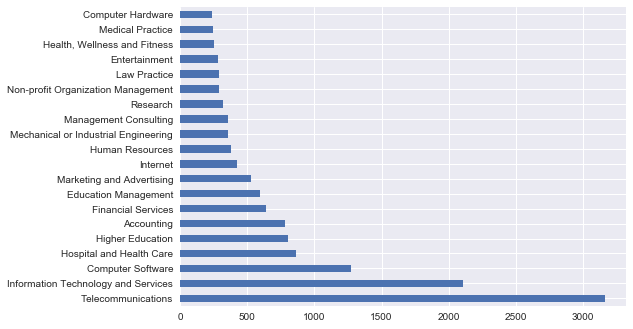

In [109]:
prof_df['professionals_industry'].value_counts()[:20].plot(kind='barh')

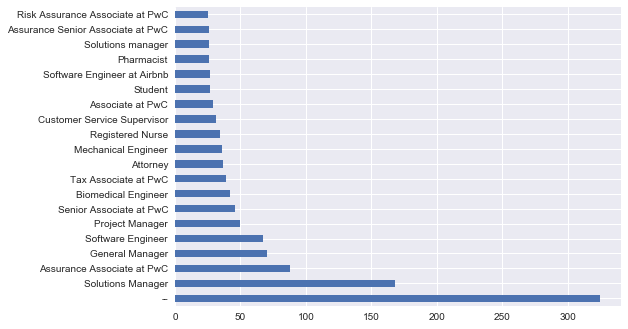

In [110]:
prof_df['professionals_headline'].value_counts()[:20].plot(kind='barh')

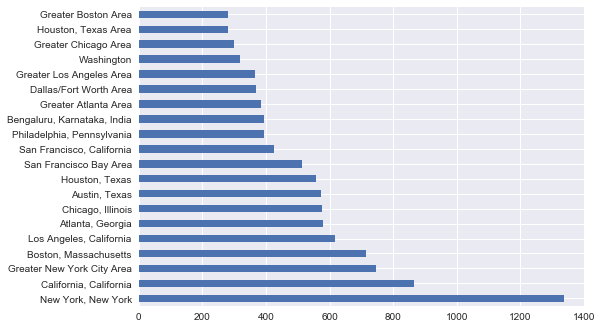

In [111]:
prof_df['professionals_location'].value_counts()[:20].plot(kind='barh')

In [16]:
prof_df['professionals_location'].value_counts()

New York, New York                               1337
California, California                            864
Greater New York City Area                        745
Boston, Massachusetts                             714
Los Angeles, California                           617
Atlanta, Georgia                                  578
Chicago, Illinois                                 576
Austin, Texas                                     574
Houston, Texas                                    556
San Francisco Bay Area                            513
San Francisco, California                         425
Philadelphia, Pennsylvania                        394
Bengaluru, Karnataka, India                       394
Greater Atlanta Area                              383
Dallas/Fort Worth Area                            368
Greater Los Angeles Area                          364
Washington                                        318
Greater Chicago Area                              298
Houston, Texas Area         

## Step. Exploratory Data Analysis : Students Data

In [17]:
stu_df=pd.read_csv('./data/students.csv')

## Frequency counts of Students location

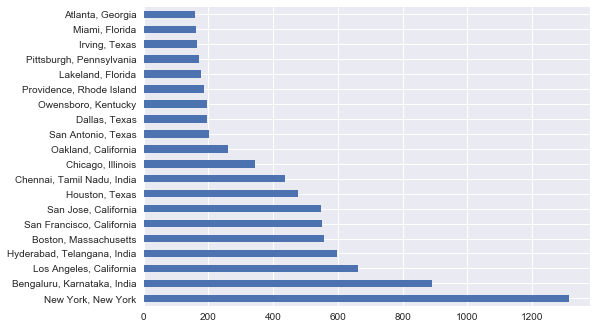

In [88]:
stu_df['students_location'].value_counts()[:20].plot(kind='barh')

In [18]:
stu_df['students_location'].value_counts()

New York, New York                       1313
Bengaluru, Karnataka, India               890
Los Angeles, California                   663
Hyderabad, Telangana, India               597
Boston, Massachusetts                     557
San Francisco, California                 550
San Jose, California                      548
Houston, Texas                            476
Chennai, Tamil Nadu, India                437
Chicago, Illinois                         344
Oakland, California                       261
San Antonio, Texas                        202
Dallas, Texas                             197
Owensboro, Kentucky                       196
Providence, Rhode Island                  187
Lakeland, Florida                         177
Pittsburgh, Pennsylvania                  170
Irving, Texas                             166
Miami, Florida                            161
Atlanta, Georgia                          160
Austin, Texas                             151
Philadelphia, Pennsylvania        

## NMF Topic Modelling: Answers

In [121]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\Rahul Raina\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
qa_df_answers=qa_df['answers_body']
qa_df_answers.head()

0    <p>Hi!</p>\n<p>You are asking a very interesti...
1    <p>Hi. I joined the Army after I attended coll...
2    <p>Dear Priyanka,</p><p>Greetings! I have answ...
3    <p>I work for a global company who values high...
4    I agree with Denise. Every single job I've had...
Name: answers_body, dtype: object

In [5]:
import numpy as np
 
from sklearn.feature_extraction.text import TfidfVectorizer
 
from sklearn.decomposition import NMF

# convert the text to a tf-idf weighted term-document matrix
 
vectorizer = TfidfVectorizer(max_features=19000, min_df=1, stop_words='english')
 
X = vectorizer.fit_transform(qa_df['answers_body'].values.astype('U'))
 
idx_to_word = np.array(vectorizer.get_feature_names())
 
# apply NMF
 
nmf = NMF(n_components=20, solver="cd")
 
W = nmf.fit_transform(X)
 
H = nmf.components_
 
# print the topics
 
for i, topic in enumerate(H):
 
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))
    

Topic 1: know,good,things,work,like,want,don,make,people,time
Topic 2: donation,org,weneedmore,provides,participate,cause,donate,fundraiser,code,nan
Topic 3: development,skills,teaching,teach,subject,em,strong,ul,ol,li
Topic 4: relate,step,suited,determine,personality,traits,various,area,important,career
Topic 5: html,watch,youtube,org,check,link,https,http,com,www
Topic 6: relaxed,background,routine,style,transparent,color,time,span,lt,gt
Topic 7: congratulations,career,demands,presents,area,step,doing,meet,strong,nbsp
Topic 8: field,skills,internships,jobs,internship,resume,company,work,experience,job
Topic 9: physics,aerospace,chemical,math,civil,electrical,engineer,engineers,mechanical,engineering
Topic 10: mba,company,economics,financial,sales,management,finance,marketing,accounting,business
Topic 11: https,hi,warmly,erinn,hey,em,helps,hope,strong,br
Topic 12: hospital,biology,med,doctor,medicine,nurse,residency,nursing,years,medical
Topic 13: transfer,classes,time,campus,colleges

## NMF Topic Modelling: Questions

In [12]:
qa_df_questions=qa_df['questions_title']
qa_df_questions.head()

0                          Teacher   career   question
1    I want to become an army officer. What can I d...
2    I want to become an army officer. What can I d...
3    Will going abroad for your first job increase ...
4    To become a specialist in business  management...
Name: questions_title, dtype: object

In [13]:
import numpy as np
 
from sklearn.feature_extraction.text import TfidfVectorizer
 
from sklearn.decomposition import NMF

# convert the text to a tf-idf weighted term-document matrix
 
vectorizer = TfidfVectorizer(max_features=19000, min_df=1, stop_words='english')
 
X = vectorizer.fit_transform(qa_df['questions_title'].values.astype('U'))
 
idx_to_word = np.array(vectorizer.get_feature_names())
 
# apply NMF
 
nmf = NMF(n_components=20, solver="cd")
 
W = nmf.fit_transform(X)
 
H = nmf.components_
 
# print the topics
 
for i, topic in enumerate(H):
 
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))

Topic 1: pay,freshman,years,better,important,community,classes,going,year,college
Topic 2: help,interested,options,successful,decide,pursue,choose,did,path,career
Topic 3: nurse,look,matter,years,year,lawyer,money,long,make,does
Topic 4: science,accounting,marketing,biology,decide,psychology,choose,double,minor,major
Topic 5: years,nursing,student,prepare,classes,law,graduate,medical,high,school
Topic 6: ways,internship,prepare,pay,whats,schools,colleges,scholarships,way,best
Topic 7: help,difficult,getting,love,did,interview,opportunities,time,hard,job
Topic 8: electrical,biomedical,computer,aerospace,hard,steps,civil,mechanical,software,engineer
Topic 9: way,programs,choice,scholarships,tips,ways,teacher,idea,colleges,good
Topic 10: environmental,chemical,software,aerospace,civil,electrical,biomedical,field,mechanical,engineering
Topic 11: doctor,future,don,guide,pursue,teacher,decide,subject,lawyer,want
Topic 12: security,political,colleges,engineers,learn,difference,programming,pro

## nltk

In [137]:
!pip install nltk

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [32]:
import nltk
nltk.download()
#nltk.download('punkt')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
qa_df_answers=qa_df['answers_body']

In [54]:
#pre-work before removing puctuation
qa_df_answers = qa_df_answers.astype(str)

In [55]:
##removing punctuation. this code works
punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']


# remove ponctuation
for i,doc in enumerate(qa_df_answers): 
    for punc in punctuation: 
        doc = doc.replace(punc, ' ')
    qa_df_answers[i] = doc
    
print(qa_df_answers[0][:1000])

 p Hi   p 
 p You are asking a very interesting question   I am giving you two sites that will give you some of an explanation that may answer your question   p 
 p http   mathforum org dr math faq faq why math html  p 
 p http   www mathworksheetscenter com mathtips mathissoimportant html  p 
 p Let me know if this helps  p 


In [4]:
qa_df_answers=qa_df['answers_body'].to_string(index=False)

In [5]:
#nltk package
# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split into sentences: sentences
tokenized_answers_body=sent_tokenize(qa_df_answers)

# Make a set of unique tokens in the entire answers_body: unique_tokens
unique_tokens = set(word_tokenize(qa_df_answers))

# Print the unique tokens result
print(unique_tokens)

{'71', '_i.e', 'Gopal', '\\n\\nhtt', 'Shantavia', 'Theory', 'Solidarity', 'explai', 'Galicia.', 'Research', 'hos', 'Meredith', 'neat', 'ggggggggggggggggggg', 'Abe', 'Solutions', 'PCs', 'Adahy', 'Kalanithi', 'larisa', 'Sarah-', 'realize', 'transcript', 'Resource', 'baby', 'Band', 'inches', 'extro', 'MIhai', 'Typically', 'visualization', 'Jillian', 'Ros', 'dev', 'to', 'Needed', 'Rhayana', 'Clifton', 'colleges/universities', 'Ernesto', 'Relevancy', 'geeks', 'advancements', 'Amyah', 'elev', '79+', 'Meher', '//mastersinpsychologyguide.com/sp', '-D', 'touc', 'sk', 'dete', 'Hello\\nYou', 'pleasant', 'locatio', 'Raven', 'FAQ', 'hardware', 'Unfortunate', 'Grow', 'multifaceted', 'examiners', 'sy', 'usu', 'vs', 'Kaye', 'e', 'informatio', 'applicatio', 'Express', 'Unity3D', 'y', 'mech', '//www.amazon.jobs/location/virtual-locat', 'Madeson', 'after', 'lighter', 'additu', 'Col', 'distractions', 'mistake', 'Canon', 'Susannah', 'trending', 'edu', 'Espec', 'pediatri', 'Positivity', 'accademically', 'C+

In [13]:
print(tokenized_answers_body)

['<p>Hi!</p>\\n<p>You are asking a very interesti...\n<p>Hi.', 'I joined the Army after I attended coll...\n<p>Dear Priyanka,</p><p>Greetings!', 'I have answ...\n<p>I work for a global company who values high...', 'I agree with Denise.', "Every single job I've had...\nNetworking is a key component to progressing y...\nhttps://www.unigo.com/\\n\\nCheck out this websi...\n<p>Hi Jocelyn ,</p><p><br></p><p>May I recomme...\n<p>For the typical schedule it takes four year...\nOf course!", 'I know someone who doubled in class...\nSure!\\nMusic Therapy .', 'Actually I am learning...\n<p>Hi Rodrigo!</p>\\n<p>The important thing to ...\n<p>If you like doing creative work, graphic de...\nHi Torrey,\\n\\nwhen I went to school at univers...\n<html><head></head><body><p>Hi Deja,</p>\\n<p>K...\n<ul>\\n<li>\\n<p>4 years of college</p>\\n</li>\\n...\n<p>Hey Megan.', 'You are looking at a great field...\n<p>Gender differences in access to economic op...\n<p>It all depends on what type of job you have...

In [81]:
#Eliminating stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

filtered_sent=[]
for w in tokenized_answers_body:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_answers_body)
print("Filterd Sentence:",filtered_sent)

{'too', 'be', 'by', 'from', 'on', 'below', 'm', 'and', 'out', 'about', 'mustn', "don't", 'y', 'your', 'through', 'these', 'under', "mightn't", 'should', 'few', 'we', "didn't", 'hasn', 'needn', "hasn't", 'as', 'just', 'it', "needn't", 'a', 'most', 'they', 'couldn', 'the', 'his', 'our', 'own', "weren't", 'am', 'was', 'but', 'of', 'weren', 'yourselves', "shan't", "hadn't", 'any', 'at', 'over', 'can', 'them', 'has', "wouldn't", 'why', 'won', 'no', 'other', 'between', 'above', 'me', 'herself', 'there', 'wasn', 'will', 'their', 'were', 'shouldn', 'such', 'to', 'or', 'who', 've', 's', 'she', 'yours', 'whom', 'isn', 'are', 'being', 'with', 'yourself', "it's", 'hers', 'now', 'once', 'didn', "couldn't", 'up', 'in', 'wouldn', 'i', 'only', 'been', 'you', 'my', "won't", 'those', 'having', 'o', 'ain', 'more', 'is', 'both', 'themselves', "wasn't", "isn't", 'shan', "you're", 'what', 'haven', 'have', 'does', 'himself', 'did', "that'll", 'nor', 'so', 'during', "should've", 'doesn', 'hadn', 'same', "you'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [65]:
#nltk - stemming 
#from nltk.stem import PorterStemmer
#from nltk.tokenize import sent_tokenize, word_tokenize
 
#ps = PorterStemmer()
 
#words = word_tokenize(tokenized_answers_body)
 
#for word in words:
 #   print(word + ":" + ps.stem(word))

In [66]:
#Dispersion plot

#tokenized_answers_body.dispersion_plot(["college", "major"])

In [68]:
#Frequency distribution pre-work

#from nltk.probability import FreqDist
#tokenized_answers_body
#tokens = [t for t in tokenized_answers_body.split()]
#freq = nltk.FreqDist(tokens)
#for key,val in freq.items():
   # print (str(key) + ':' + str(val))
#print(fdist)

In [16]:
##removing punctuation for tokenized_answers_body
punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', '!'
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']

# remove ponctuation
for i,doc in enumerate(tokenized_answers_body): 
    for punc in punctuation: 
        doc = doc.replace(punc, ' ')
    tokenized_answers_body[i] = doc
    
print(tokenized_answers_body[0][:1000])

 p Hi   p  n p You are asking a very interesti   
 p Hi 


In [20]:
#Frequency Distribution
from nltk.book import FreqDist

fdist1 = FreqDist(tokenized_answers_body) 
print(fdist1) 
fdist1.most_common(20) 

<FreqDist with 12782 samples and 13063 outcomes>


[('Great question ', 75),
 ('   ', 28),
 ('This is a great question ', 23),
 ('Yes ', 20),
 (' ', 16),
 ('Absolutely ', 16),
 ('Good question ', 15),
 ('Practice ', 9),
 ('Interesting question ', 6),
 ('T   ', 6),
 ('Seriously ', 5),
 ('Wow ', 4),
 ('Thank you for your question ', 4),
 ('What do you do well ', 4),
 ('S   ', 3),
 ('Thanks for submitting a question ', 3),
 (' p 1 ', 3),
 (' Where do you work ', 3),
 ('A ', 3),
 ('That is a great question ', 3)]

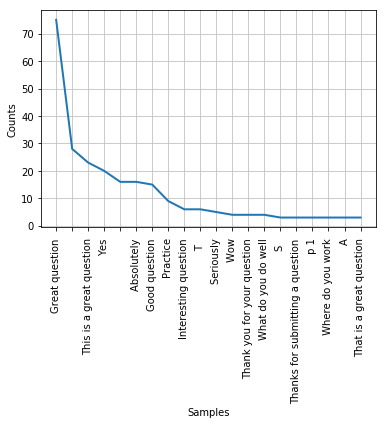

In [18]:
#Frequency distribution pre-work
fdist1.plot(20, cumulative=False)
plt.show()

In [22]:
#Collocations & Bigrams
#A collocation is a sequence of words that occur together unusually often. 
#Thus red wine is a collocation, whereas the wine is not. To get a handle on collocations, 
#we start off by extracting from a text a list of word pairs, also known as bigrams. 
from nltk import bigrams
list(bigrams(tokenized_answers_body))


[(' p Hi   p  n p You are asking a very interesti   \n p Hi ',
  'I joined the Army after I attended coll   \n p Dear Priyanka   p  p Greetings '),
 ('I joined the Army after I attended coll   \n p Dear Priyanka   p  p Greetings ',
  'I have answ   \n p I work for a global company who values high   '),
 ('I have answ   \n p I work for a global company who values high   ',
  'I agree with Denise '),
 ('I agree with Denise ',
  'Every single job I ve had   \nNetworking is a key component to progressing y   \nhttps   www unigo com  n nCheck out this websi   \n p Hi Jocelyn    p  p  br   p  p May I recomme   \n p For the typical schedule it takes four year   \nOf course '),
 ('Every single job I ve had   \nNetworking is a key component to progressing y   \nhttps   www unigo com  n nCheck out this websi   \n p Hi Jocelyn    p  p  br   p  p May I recomme   \n p For the typical schedule it takes four year   \nOf course ',
  'I know someone who doubled in class   \nSure  nMusic Therapy  '),
 (

In [28]:
tokenized_answers_body_big = list(bigrams(tokenized_answers_body))

In [34]:
#collocation
#from nltk.collocations import *
#bigram_measures = nltk.collocations.tokenized_answers_body_big()

## Bags of words Model

In [41]:
qa_df_questions=qa_df['questions_body']

In [42]:
qa_df_questions=qa_df['questions_body'].to_string(index=False)

In [53]:
#bags of words: extracting features from the text

# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(qa_df_questions)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))


[('i', 51152), ('...', 48206), ('to', 21319), ('a', 20166), ('#', 15219), ('in', 14352), ('am', 13904), ('and', 11448), (',', 8904), ('want', 7780)]


In [60]:
#Text preprocessing practice remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on 
#your cleaned text.
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]


# Create the bag-of-words: bow
bow = Counter(alpha_only)

# Print the 10 most common tokens
print(bow.most_common(300))


[('i', 51152), ('to', 21319), ('a', 20166), ('in', 14352), ('am', 13904), ('and', 11448), ('want', 7780), ('the', 6748), ('my', 6369), ('is', 5221), ('school', 4942), ('have', 4777), ('be', 4645), ('of', 4414), ('college', 4298), ('what', 3913), ('high', 3887), ('know', 3809), ('for', 3703), ('do', 2976), ('interested', 2925), ('an', 2890), ('this', 2826), ('but', 2805), ('that', 2783), ('like', 2606), ('would', 2567), ('because', 2556), ('it', 2382), ('about', 2228), ('on', 2033), ('career', 2030), ('are', 2014), ('p', 1976), ('student', 1867), ('as', 1860), ('you', 1838), ('at', 1829), ('major', 1791), ('how', 1769), ('become', 1688), ('asking', 1653), ('currently', 1610), ('if', 1553), ('going', 1539), ('hi', 1484), ('was', 1473), ('go', 1469), ('senior', 1462), ('been', 1420), ('really', 1411), ('not', 1409), ('with', 1385), ('get', 1329), ('love', 1304), ('into', 1297), ('junior', 1266), ('question', 1204), ('so', 1197), ('will', 1181), ('just', 1165), ('can', 1145), ('looking', 1

## Step Combine Questions Tags & Questions id data

In [89]:
tag_df = pd.read_csv('./data/tags.csv')
tagq_df = pd.read_csv('./data/tag_questions.csv')

In [90]:
tag_df.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [91]:
tagq_df.head()

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


In [62]:
#tag_comb_df = pd.merge(tag_df,tagq_df, left_on='tag_questions_tag_id', right_on= 'tags_tag_id', how='left') \
                               # [['tag_questions_question_id','tags_tag_name']].rename(columns = {'tags_tag_name':'question_tag'})